# Model Building
## Binary Classification Machine Learning task

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import pickle

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
data = pd.read_csv("online_shoppers_intention.csv")
print(data.shape)
data.head(5)

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Preprocessing 

### Converting Data types of 'Revenue',  'Weekend'

In [4]:
data['Revenue'] = data['Revenue'].astype(int)
print(data['Revenue'].value_counts())


0    10422
1     1908
Name: Revenue, dtype: int64


In [5]:
data['Weekend'] = data['Weekend'].astype(int)
print(data['Weekend'].value_counts())


0    9462
1    2868
Name: Weekend, dtype: int64


### Mapping String values to Integer values in 'VisitorType' and 'Month'

In [6]:
VisitorType_mapping = {
        'New_Visitor': 1,
        'Returning_Visitor': 2,
        'Other': 3
    }

month_mapping = {
        'Jan': 1,
        'Feb': 2,
        'Mar': 3,
        'Apr': 4,
        'May': 5,
        'June': 6,
        'Jul': 7,
        'Aug': 8,
        'Sep': 9,
        'Oct': 10,
        'Nov': 11,
        'Dec': 12
    }

In [7]:
data['VisitorType'] = data['VisitorType'].map(VisitorType_mapping)
data['Month'] = data['Month'].map(month_mapping)

In [8]:
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Feature Selection

#### Check Multicollinearity

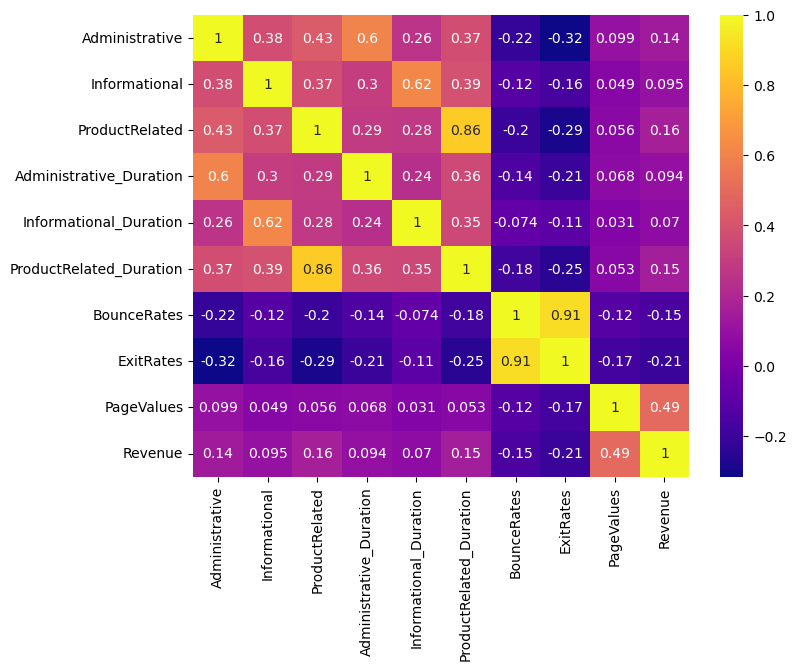

In [10]:
data_num=data[['Administrative','Informational','ProductRelated','Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','Revenue']]

# Set the size of the figure
plt.figure(figsize=(8, 6))


# plotting correlation heatmap
g = sns.heatmap(data_num.corr(), annot=True, cmap = 'plasma')
  
# displaying heatmap
plt.show()

In [11]:
data1 = data.drop(['ProductRelated','ExitRates'], axis=1)

#### Using Sequential Feature Selector

In [12]:
x=data1.drop(['Revenue'], axis=1)
y=data1['Revenue']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Select the classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize the SFS object
sfs = SequentialFeatureSelector(clf, direction='backward', scoring='recall')

# Fit the SFS object to the training data
sfs = sfs.fit(X_train, y_train)
selected_features = sfs.get_support()
print('The selected features are:\n', list(X_train.columns[selected_features]))

The selected features are:
 ['Administrative', 'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'Month', 'Region']


### Encoding the Categorical Features

In [14]:
x2 = data1[['Administrative', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month']]

In [15]:
#Creat OneHotEncoder object
encoder = OneHotEncoder(sparse=False, drop=None)

# Fit and transform the data
encoded_data = encoder.fit_transform(x2[['SpecialDay', 'Month']])

# Convert the encoded data to a DataFrame with meaningful column names
encoded_df = pd.DataFrame(
    encoded_data,
    columns=[f"{col}_{val}" for col, vals in zip(['SpecialDay', 'Month'], encoder.categories_) for val in vals]
)

# Concatenate the original DataFrame with the encoded DataFrame
x_encoded = pd.concat([x2, encoded_df], axis=1)

# Drop the original columns that were encoded
x_encoded = x_encoded.drop(['SpecialDay', 'Month'], axis=1)

# Display the DataFrame with the merged encoded columns
x_encoded

,Administrative,ProductRelated_Duration,BounceRates,PageValues,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0,Month_2,Month_3,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,0.000000,0.200000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,64.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.000000,0.200000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2.666667,0.050000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,627.500000,0.020000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,1783.791667,0.007143,12.241717,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0,465.750000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12327,0,184.250000,0.083333,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12328,4,346.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Saving the encoder object as pickle file (Will be required in deployment)

In [16]:
with open('encoder.pickle', 'wb') as file:
    pickle.dump(encoder, file)

### Splitting the data for Training an Testing

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x_encoded,y,test_size=0.30 , random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8631, 20)
(8631,)
(3699, 20)
(3699,)


### Scaling the data

In [18]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Transform the training and test data using the scaler
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled

array([[-0.69961521, -0.60962289,  0.39168533, ..., -0.21460434,
        -0.56990258,  2.46938491],
       [-0.69961521, -0.55059981, -0.45453692, ..., -0.21460434,
        -0.56990258, -0.40495914],
       [-0.69961521, -0.4105852 , -0.45453692, ..., -0.21460434,
        -0.56990258, -0.40495914],
       ...,
       [-0.69961521, -0.55059981, -0.45453692, ..., -0.21460434,
        -0.56990258, -0.40495914],
       [-0.69961521, -0.48715569, -0.45453692, ..., -0.21460434,
        -0.56990258, -0.40495914],
       [ 1.42743048, -0.52691218, -0.45453692, ...,  4.65973796,
        -0.56990258, -0.40495914]])

#### Saving the scaler object as pickle file (Will be required in deployment)

In [19]:
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

### Fitting Logistic Regression Model

In [20]:
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train_scaled, y_train)
logreg

LogisticRegression(random_state=42)

In [21]:
y_predict_test = logreg.predict(x_test_scaled)
print(y_predict_test)

[0 0 0 ... 0 1 0]


In [22]:
accuracy = accuracy_score(y_test, y_predict_test)
print("Accuracy: ", accuracy)

Accuracy:  0.8826709921600433


#### Utility function to print various performance metrics of a model based on the confusion matrix

In [23]:
def performance_metrices(conf_matrix):
    
    true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()
    print(f"TN: {true_negative}, FP: {false_positive}")
    print(f"FN: {false_negative}, TP: {true_positive}")
    print(" ")
    
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    Precision =   true_positive / (true_positive + false_positive)
    Accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    
    print_confusion_matrix(conf_matrix)
    
    print(f"Sensitivity (True Positive Rate) or Recall: {sensitivity:.2f}")
    print(f"Specificity (True Negative Rate): {specificity:.2f}")
    print(f"Precision: {Precision:.2f}")
    print(f"Accuracy: {Accuracy:.3f}")

def print_confusion_matrix(cm):
    df_cm = pd.DataFrame(cm)
    plt.figure(figsize=(3, 2))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='coolwarm', cbar=None)#cmap = Greens ,seismic, Reds, Oranges,PuBu,BuGn, YlOrBr, viridis, cividis, coolwarm
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### Model performance on Test data set 

TN: 3058, FP: 66
FN: 368, TP: 207
 


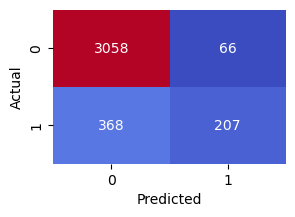

Sensitivity (True Positive Rate) or Recall: 0.36
Specificity (True Negative Rate): 0.98
Precision: 0.76
Accuracy: 0.883


In [24]:
cm_test = confusion_matrix(y_test,y_predict_test)
performance_metrices(cm_test)

### Model performance on Train data set 

In [25]:
y_predict_train = logreg.predict(x_train_scaled)
print(y_predict_train)

[0 0 0 ... 0 0 0]


TN: 7125, FP: 173
FN: 830, TP: 503
 


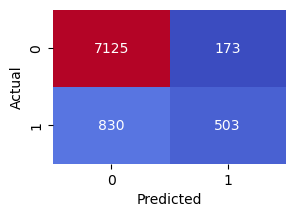

Sensitivity (True Positive Rate) or Recall: 0.38
Specificity (True Negative Rate): 0.98
Precision: 0.74
Accuracy: 0.884


In [26]:
cm_train = confusion_matrix(y_train,y_predict_train)
performance_metrices(cm_train)

#### Saving the Model as pickle file (Will be required in deployment)

In [27]:
#Saving the model for use during deployment
with open('logreg.pickle', 'wb') as f:
    pickle.dump(logreg, f)

#### Printing Model Coefficients

In [28]:
coefficients = logreg.coef_
intercept = logreg.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[ 0.02285268  0.19952941 -1.03193831  1.56544754  0.05099978  0.01573537
  -0.05093277  0.03116848 -0.07476008 -0.02697267 -0.25303216 -0.14043351
  -0.12418999 -0.02607848  0.04423257  0.0566572   0.06727807  0.06910675
   0.32418452 -0.13043904]]
Intercept: [-2.3031883]


In [29]:
x_encoded.insert(0, 'Intercept', 1)
coefficients_with_names = zip(x_encoded.columns, np.concatenate([logreg.intercept_, logreg.coef_.ravel()]))
# Print coefficients with variable names
for variable, coefficient in coefficients_with_names:
    print(f"{variable}  : {coefficient}")

Intercept  : -2.3031882957604006
Administrative  : 0.02285268326833104
ProductRelated_Duration  : 0.19952940603048608
BounceRates  : -1.0319383082734064
PageValues  : 1.5654475432886248
SpecialDay_0.0  : 0.050999780770016184
SpecialDay_0.2  : 0.015735371207448216
SpecialDay_0.4  : -0.05093277029363205
SpecialDay_0.6  : 0.03116847688301913
SpecialDay_0.8  : -0.07476008286911684
SpecialDay_1.0  : -0.026972667143120792
Month_2  : -0.2530321599508401
Month_3  : -0.14043351194255482
Month_5  : -0.12418998852592739
Month_6  : -0.026078477400060918
Month_7  : 0.044232574113447276
Month_8  : 0.05665720129625003
Month_9  : 0.06727807014191564
Month_10  : 0.06910674755395396
Month_11  : 0.3241845221244927
Month_12  : -0.13043904258111166
